## Web Scraping and Exporting Data

In [215]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = "https://www.espn.com/college-football/stats/player/_/view/offense/table/passing/sort/passingYards/dir/desc"
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

In [21]:
header = soup.find('tr',attrs={'class' : 'Table__sub-header Table__TR Table__even'})
print(header)

<tr class="Table__sub-header Table__TR Table__even"><th class="Table__TH" title=""><span class=""><div>RK</div></span></th><th class="Table__TH" title=""><span class=""><div>Name</div></span></th></tr>


In [49]:
for j in range(0,102):
    column_headers = soup.findAll('tr')[j]
    column_headers = [i.getText() for i in column_headers.findAll('th')]
    print(str(j) + ": ")
    print(column_headers)

0: 
['RK', 'Name']
1: 
[]
2: 
[]
3: 
[]
4: 
[]
5: 
[]
6: 
[]
7: 
[]
8: 
[]
9: 
[]
10: 
[]
11: 
[]
12: 
[]
13: 
[]
14: 
[]
15: 
[]
16: 
[]
17: 
[]
18: 
[]
19: 
[]
20: 
[]
21: 
[]
22: 
[]
23: 
[]
24: 
[]
25: 
[]
26: 
[]
27: 
[]
28: 
[]
29: 
[]
30: 
[]
31: 
[]
32: 
[]
33: 
[]
34: 
[]
35: 
[]
36: 
[]
37: 
[]
38: 
[]
39: 
[]
40: 
[]
41: 
[]
42: 
[]
43: 
[]
44: 
[]
45: 
[]
46: 
[]
47: 
[]
48: 
[]
49: 
[]
50: 
[]
51: 
['POS', 'CMP', 'ATT', 'CMP%', 'YDS', 'AVG', 'LNG', 'TD', 'INT', 'SACK', 'RTG']
52: 
[]
53: 
[]
54: 
[]
55: 
[]
56: 
[]
57: 
[]
58: 
[]
59: 
[]
60: 
[]
61: 
[]
62: 
[]
63: 
[]
64: 
[]
65: 
[]
66: 
[]
67: 
[]
68: 
[]
69: 
[]
70: 
[]
71: 
[]
72: 
[]
73: 
[]
74: 
[]
75: 
[]
76: 
[]
77: 
[]
78: 
[]
79: 
[]
80: 
[]
81: 
[]
82: 
[]
83: 
[]
84: 
[]
85: 
[]
86: 
[]
87: 
[]
88: 
[]
89: 
[]
90: 
[]
91: 
[]
92: 
[]
93: 
[]
94: 
[]
95: 
[]
96: 
[]
97: 
[]
98: 
[]
99: 
[]
100: 
[]
101: 
[]


In [52]:
column_headers = soup.findAll('tr')[51]
column_headers = [i.getText() for i in column_headers.findAll('th')]
column_headers

['POS', 'CMP', 'ATT', 'CMP%', 'YDS', 'AVG', 'LNG', 'TD', 'INT', 'SACK', 'RTG']

In [56]:
players = soup.find_all('tr', attrs={"class":re.compile("Table__TR Table__TR--sm Table__even")})
len(players)

100

In [91]:

player_headers = soup.findAll('tr')[0]
player_headers = [i.getText() for i in player_headers.findAll('th')]
player_headers

column_headers = soup.findAll('tr')[51]
column_headers = [i.getText() for i in column_headers.findAll('th')]
column_headers

QB_data = pd.DataFrame()

for year in range(2004,2021):
    player_df = pd.DataFrame()
    stats_df = pd.DataFrame()
    final_df = pd.DataFrame()
    url = "https://www.espn.com/college-football/stats/player/_/view/offense/season/" + str(year) + "/table/passing/sort/passingYards/dir/desc"
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    
    
    players = soup.find_all('tr', attrs={"class":re.compile("Table__TR Table__TR--sm Table__even")})
    i=0
    for player in players:
        stats = [stat.get_text() for stat in player.find_all('td')]
            
        temp = pd.DataFrame(stats).transpose()
        temp.columns = player_headers
        
        player_df = pd.concat([player_df,temp], ignore_index=True)
        if i > 48:
            break
        i=i+1

    i=0
    for player in players:
        if i < 50:
            i=i+1
            continue
        i=i+1
        stats = [stat.get_text() for stat in player.find_all('td')]
        
        temp = pd.DataFrame(stats).transpose()
        temp.columns = column_headers
        
        stats_df = pd.concat([stats_df,temp], ignore_index=True)
    
    final_df = pd.concat([player_df,stats_df],axis=1)
    final_df["YEAR"] = year
    QB_data = pd.concat([QB_data,final_df])



In [92]:
QB_data.head(10)

,RK,Name,POS,CMP,ATT,CMP%,YDS,AVG,LNG,TD,INT,SACK,RTG,YEAR
0,1,Sonny CumbieTTU,QB,421,642,65.6,"4,742",7.4,80,32,18,26,138.5,2004
1,1,Timmy ChangHAW,QB,358,602,59.5,"4,258",7.1,75,37,13,15,134.8,2004
2,1,Omar JacobsBGSU,QB,309,462,66.9,"4,002",8.7,58,41,4,10,167.2,2004
3,1,Derek AndersonORST,QB,279,515,54.2,"3,615",7.0,55,29,17,37,125.1,2004
4,1,Bruce GradkowskiTOL,QB,280,399,70.2,"3,518",8.8,96,27,8,14,162.6,2004
5,1,Josh BettsM-OH,QB,268,444,60.4,"3,512",7.9,79,23,14,24,137.6,2004
6,1,Dan OrlovskyCONN,QB,288,457,63.0,"3,354",7.3,90,23,15,14,134.7,2004
7,1,Matt LeinartUSC,QB,269,412,65.3,"3,322",8.1,69,33,6,23,156.5,2004
8,1,Jason WhiteOKLA,QB,255,390,65.4,"3,205",8.2,72,35,9,9,159.4,2004
9,1,Chris LeakFLA,QB,238,399,59.6,"3,199",8.0,81,29,12,19,145.0,2004


In [113]:
QB_data.tail()

,RK,Name,POS,CMP,ATT,CMP%,YDS,AVG,LNG,TD,INT,SACK,RTG,YEAR
45,46,Michael Penix Jr.IU,QB,124,220,56.4,"1,645",7.5,68,14,4,7,136.5,2020
46,47,Jeff SimsGT,QB,124,226,54.9,"1,643",7.3,59,11,11,18,122.3,2020
47,48,Michael PrattTULN,QB,128,229,55.9,"1,638",7.2,52,18,5,25,137.6,2020
48,49,Max DugganTCU,QB,136,227,59.9,"1,635",7.2,71,9,4,18,130.0,2020
49,50,Alan BowmanTTU,QB,150,232,64.7,"1,602",6.9,48,10,7,2,130.8,2020


In [102]:
url2 = "http://www.drafthistory.com/index.php/rounds/round_1"
page2 = requests.get(url2)
soup = BeautifulSoup(page2.text, 'html.parser')

#draft_cols = soup.findAll('tr')
#for j in range(0,2000):
#    draft_cols = soup.findAll('tr')[j]
#    draft_cols = [i.getText() for i in draft_cols.findAll('th')]
#    print(str(j) + ": ")
#    print(draft_cols)

draft_cols = soup.findAll('tr')[1]
draft_cols = [i.getText() for i in draft_cols.findAll('th')]
draft_cols

['Year', 'Round', 'Pick', 'Player', 'Name', 'Team', 'Position', 'College']

In [108]:
url2 = "http://www.drafthistory.com/index.php/rounds/round_1"
page2 = requests.get(url2)
soup = BeautifulSoup(page2.text, 'html.parser')

draft_cols = soup.findAll('tr')[1]
draft_cols = [i.getText() for i in draft_cols.findAll('th')]
draft_df = pd.DataFrame()

rd1pl = soup.find_all('tr', attrs={"bgcolor":re.compile("ffffff")})
for player in rd1pl:
    info = [stat.get_text() for stat in player.find_all('td')]
            
    temp = pd.DataFrame(info).transpose()
    temp.columns = draft_cols
        
    draft_df = pd.concat([draft_df,temp], ignore_index=True)


In [112]:
#draft_df.to_csv("draft_df.csv")
#QB_data.to_csv("QB_data.csv")

## Data Cleaning

In [179]:
qb_stats = pd.read_csv("QB_data.csv")

First we will clean up the QB Data...

In [180]:
qb_stats.head()

,Unnamed: 0,RK,Name,POS,CMP,ATT,CMP%,YDS,AVG,LNG,TD,INT,SACK,RTG,YEAR
0,0,1,Sonny CumbieTTU,QB,421,642,65.6,"4,742",7.4,80,32,18,26,138.5,2004
1,1,1,Timmy ChangHAW,QB,358,602,59.5,"4,258",7.1,75,37,13,15,134.8,2004
2,2,1,Omar JacobsBGSU,QB,309,462,66.9,"4,002",8.7,58,41,4,10,167.2,2004
3,3,1,Derek AndersonORST,QB,279,515,54.2,"3,615",7.0,55,29,17,37,125.1,2004
4,4,1,Bruce GradkowskiTOL,QB,280,399,70.2,"3,518",8.8,96,27,8,14,162.6,2004


In [181]:
qb_stats.columns

Index(['Unnamed: 0', 'RK', 'Name', 'POS', 'CMP', 'ATT', 'CMP%', 'YDS', 'AVG',
       'LNG', 'TD', 'INT', 'SACK', 'RTG', 'YEAR'],
      dtype='object')

In [182]:
qb_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
Unnamed: 0    850 non-null int64
RK            850 non-null int64
Name          850 non-null object
POS           850 non-null object
CMP           850 non-null int64
ATT           850 non-null int64
CMP%          850 non-null float64
YDS           850 non-null object
AVG           850 non-null float64
LNG           850 non-null int64
TD            850 non-null int64
INT           850 non-null int64
SACK          850 non-null int64
RTG           850 non-null float64
YEAR          850 non-null int64
dtypes: float64(3), int64(9), object(3)
memory usage: 99.7+ KB


In [183]:
qb_stats.replace(',','', regex=True, inplace=True)

In [184]:
qb_stats['YDS'] = qb_stats['YDS'].astype('int')

In [185]:
qb_stats.drop(['Unnamed: 0', 'RK','POS'], axis=1,inplace=True)

In [186]:
pattern = '[A-Z]{2,}'
qb_stats['College'] = qb_stats['Name'].apply(lambda x:str(re.findall(pattern, x)[0]))
qb_stats['Name'] = qb_stats['Name'].apply(lambda x: x.replace((re.findall(pattern, x)[0]),""))

In [187]:
qb_stats.head()

,Name,CMP,ATT,CMP%,YDS,AVG,LNG,TD,INT,SACK,RTG,YEAR,College
0,Sonny Cumbie,421,642,65.6,4742,7.4,80,32,18,26,138.5,2004,TTU
1,Timmy Chang,358,602,59.5,4258,7.1,75,37,13,15,134.8,2004,HAW
2,Omar Jacobs,309,462,66.9,4002,8.7,58,41,4,10,167.2,2004,BGSU
3,Derek Anderson,279,515,54.2,3615,7.0,55,29,17,37,125.1,2004,ORST
4,Bruce Gradkowski,280,399,70.2,3518,8.8,96,27,8,14,162.6,2004,TOL


Now we will clean the draft data to get ready to combine...

In [194]:
draft_stats = pd.read_csv("draft_df.csv")

In [195]:
draft_stats.head()

,Unnamed: 0,Year,Round,Pick,Player,Name,Team,Position,College
0,0,2020,1,1,1,Joe Burrow,Bengals,QB,Louisiana State
1,1,,1,3,3,Jeff Okudah,Lions,DB,Ohio State
2,2,,1,5,5,Tua Tagovailoa,Dolphins,QB,Alabama
3,3,,1,7,7,Derrick Brown,Panthers,DT,Auburn
4,4,,1,9,9,CJ Henderson,Jaguars,DB,Florida


In [196]:
draft_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 9 columns):
Unnamed: 0    997 non-null int64
Year          997 non-null object
Round         997 non-null int64
Pick          997 non-null int64
Player        997 non-null int64
Name          997 non-null object
Team          997 non-null object
Position      997 non-null object
College       997 non-null object
dtypes: int64(4), object(5)
memory usage: 70.2+ KB


In [197]:
draft_stats[draft_stats["Year"] == '2003']

,Unnamed: 0,Year,Round,Pick,Player,Name,Team,Position,College
271,271,2003,1,1,1,Carson Palmer,Bengals,QB,USC


In [198]:
draft_stats = draft_stats.loc[:270,:]

In [199]:
draft_stats.tail()

,Unnamed: 0,Year,Round,Pick,Player,Name,Team,Position,College
266,266,,1,23,23,Marcus Tubbs,Seahawks,DT,Texas
267,267,,1,25,25,Ahmad Carroll,Packers,DB,Arkansas
268,268,,1,27,27,Jason Babin,Texans,DE,Western Michigan
269,269,,1,29,29,Michael Jenkins,Falcons,WR,Ohio State
270,270,,1,31,31,Rashaun Woods,49ers,WR,Oklahoma State


In [200]:
draft_stats = draft_stats['Name']

In [201]:
draft_stats

0           Joe Burrow
1          Jeff Okudah
2       Tua Tagovailoa
3        Derrick Brown
4         CJ Henderson
            ...       
266       Marcus Tubbs
267      Ahmad Carroll
268        Jason Babin
269    Michael Jenkins
270      Rashaun Woods
Name: Name, Length: 271, dtype: object

Now to combine the datasets...

In [209]:
round_1 = draft_stats.to_list()

qb_stats['Round_1'] = qb_stats['Name'].apply(lambda x: True if (x in round_1) else False)

In [210]:
qb_stats.head()

,Name,CMP,ATT,CMP%,YDS,AVG,LNG,TD,INT,SACK,RTG,YEAR,College,Round_1
0,Sonny Cumbie,421,642,65.6,4742,7.4,80,32,18,26,138.5,2004,TTU,False
1,Timmy Chang,358,602,59.5,4258,7.1,75,37,13,15,134.8,2004,HAW,False
2,Omar Jacobs,309,462,66.9,4002,8.7,58,41,4,10,167.2,2004,BGSU,False
3,Derek Anderson,279,515,54.2,3615,7.0,55,29,17,37,125.1,2004,ORST,False
4,Bruce Gradkowski,280,399,70.2,3518,8.8,96,27,8,14,162.6,2004,TOL,False


In [213]:
(qb_stats[qb_stats['Round_1'] == True])

,Name,CMP,ATT,CMP%,YDS,AVG,LNG,TD,INT,SACK,RTG,YEAR,College,Round_1
15,Alex Smith,214,317,67.5,2952,9.3,78,32,4,18,176.5,2004,UTAH,True
26,Jason Campbell,188,270,69.6,2700,10.0,87,20,7,13,172.9,2004,AUB,True
66,Jay Cutler,273,462,59.1,3073,6.7,47,21,9,24,126.1,2005,VAN,True
67,Vince Young,212,325,65.2,3036,9.3,75,26,10,13,163.9,2005,TEX,True
97,JaMarcus Russell,188,311,60.5,2443,7.9,50,15,9,21,136.6,2005,LSU,True
112,JaMarcus Russell,232,342,67.8,3129,9.1,58,28,8,16,167.0,2006,LSU,True
251,Levi Brown,321,504,63.7,4254,8.4,70,23,9,24,146.1,2009,TROY,True
256,Blaine Gabbert,262,445,58.9,3593,8.1,84,24,9,19,140.5,2009,MIZ,True
283,Jake Locker,230,395,58.2,2800,7.1,51,21,11,28,129.7,2009,WASH,True
288,Christian Ponder,227,330,68.8,2717,8.2,98,14,7,15,147.7,2009,FSU,True


## Exploring and Dividing up Data into Test and Train

In [219]:
train = qb_stats[qb_stats['YEAR'] != 2020]
test = qb_stats[qb_stats['YEAR'] == 2020]

In [224]:
print(len(train))
print(len(test))

800
50


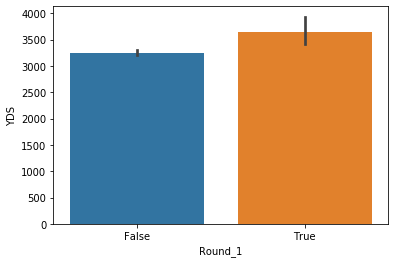

In [229]:
sns.barplot(y='YDS',x='Round_1', data=train)

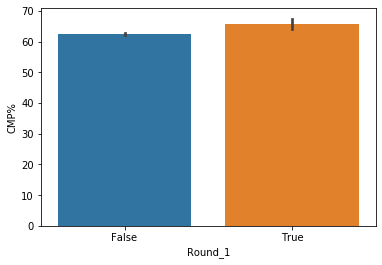

In [230]:
sns.barplot(y='CMP%',x='Round_1', data=train)

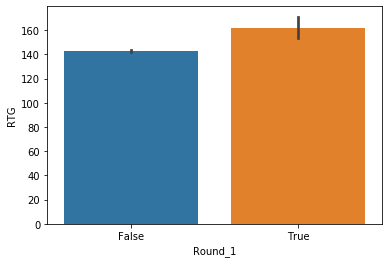

In [231]:
sns.barplot(y='RTG',x='Round_1', data=train)

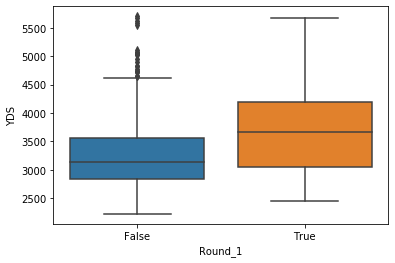

In [232]:
sns.boxplot(y='YDS',x='Round_1',data=train)

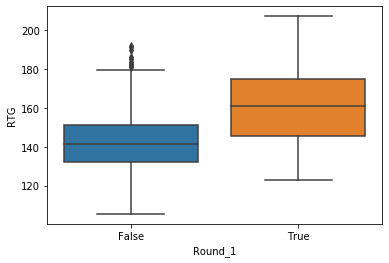

In [233]:
sns.boxplot(y='RTG',x='Round_1',data=train)

In [235]:
train.describe()

,CMP,ATT,CMP%,YDS,AVG,LNG,TD,INT,SACK,RTG,YEAR
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,261.383750,417.613750,62.467875,3266.630000,7.863875,74.181250,24.715000,10.273750,22.737500,143.212625,2011.500000
std,52.460739,71.335987,4.377063,592.732288,0.928283,11.135569,7.853558,3.647663,8.589285,15.810460,4.612656
min,162.000000,252.000000,48.500000,2222.000000,5.600000,44.000000,10.000000,2.000000,3.000000,105.500000,2004.000000
25%,226.000000,369.000000,59.400000,2842.000000,7.200000,67.000000,19.000000,8.000000,16.000000,132.475000,2007.750000
50%,250.500000,405.000000,62.400000,3136.000000,7.800000,75.000000,24.000000,10.000000,22.000000,141.750000,2011.500000
75%,287.000000,454.000000,65.450000,3576.000000,8.400000,81.000000,29.000000,13.000000,28.000000,152.125000,2015.250000
max,512.000000,714.000000,76.700000,5705.000000,11.600000,99.000000,60.000000,23.000000,54.000000,206.900000,2019.000000


In [237]:
train[train["Round_1"] == True].describe()

,CMP,ATT,CMP%,YDS,AVG,LNG,TD,INT,SACK,RTG,YEAR
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,270.516129,411.709677,65.787097,3656.451613,8.990323,74.193548,30.193548,8.161290,21.709677,162.080645,2012.225806
std,57.801310,82.262261,4.962979,759.640654,1.429068,13.115943,10.565413,3.088654,8.331441,24.603583,4.786855
min,180.000000,252.000000,56.000000,2443.000000,6.600000,47.000000,14.000000,3.000000,6.000000,123.200000,2004.000000
25%,228.500000,356.500000,62.600000,3054.500000,8.150000,67.500000,22.000000,6.000000,15.500000,145.500000,2009.000000
50%,262.000000,395.000000,67.200000,3665.000000,8.900000,76.000000,31.000000,8.000000,23.000000,161.100000,2013.000000
75%,303.500000,477.500000,69.000000,4198.500000,9.750000,84.000000,36.500000,9.500000,27.500000,174.900000,2016.000000
max,408.000000,564.000000,76.300000,5671.000000,11.600000,98.000000,60.000000,15.000000,39.000000,206.900000,2019.000000


In [238]:
train[train["Round_1"] == False].describe()

,CMP,ATT,CMP%,YDS,AVG,LNG,TD,INT,SACK,RTG,YEAR
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,261.015605,417.851756,62.334070,3250.915475,7.818466,74.180754,24.494148,10.358908,22.778934,142.452016,2011.470741
std,52.241823,70.911413,4.302002,580.164324,0.873747,11.058313,7.651612,3.644513,8.602206,14.881717,4.606324
min,162.000000,257.000000,48.500000,2222.000000,5.600000,44.000000,10.000000,2.000000,3.000000,105.500000,2004.000000
25%,226.000000,370.000000,59.400000,2838.000000,7.200000,67.000000,19.000000,8.000000,16.000000,132.200000,2007.000000
50%,250.000000,405.000000,62.300000,3131.000000,7.700000,75.000000,24.000000,10.000000,22.000000,141.200000,2011.000000
75%,286.000000,453.000000,65.300000,3557.000000,8.400000,81.000000,29.000000,13.000000,28.000000,151.100000,2015.000000
max,512.000000,714.000000,76.700000,5705.000000,11.300000,99.000000,58.000000,23.000000,54.000000,191.800000,2019.000000


## Building the models